In [1]:
import sys
sys.path.insert(0, '../../utils/')

In [2]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams['figure.dpi']= 500
sns.set_context("notebook")
sns.set(style="white")

In [3]:
from top_genes import mean_of_attention_heads

In [16]:
LATENT_DIM = 50
ATTN_HEADS = 10

In [5]:
cellvgae_node_embs = np.load('Darmanis/CellVGAE/cellvgae_node_embs.npy')
cellvgae_umap = np.load('Darmanis/CellVGAE/cellvgae_umap.npy')
cellvgae_clusters = np.load('Darmanis/CellVGAE/cellvgae_clusters.npy')

In [7]:
layer_1_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_1_attention_edge_index.pt')
layer_1_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_1_attention_coeff.pt')

In [8]:
layer_2_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_2_attention_edge_index.pt')
layer_2_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_2_attention_coeff.pt')

In [9]:
layer_mean_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_mean_attention_edge_index.pt')
layer_mean_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_mean_attention_coeff.pt')

In [10]:
layer_std_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_std_attention_edge_index.pt')
layer_std_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_std_attention_coeff.pt')

In [21]:
darmanis_df = pd.read_csv('Darmanis/darmanis_ground_truth_clusters.csv')

In [22]:
cell_types = darmanis_df['Cluster'].values.tolist()

In [23]:
num_cells = len(cell_types)

In [14]:
def get_cell_weights_for_layer(layer_edge_index, layer_coeff):
    cell_weights = []
    for dim in range(0, ATTN_HEADS):
        cell_weights_dim = []
        for cell_id in range(num_cells):
            dim0 = layer_edge_index[0] == cell_id
            dim1 = layer_edge_index[1] == cell_id
            idxs = torch.logical_or(dim0, dim1)
            cell_weight = torch.sum(layer_coeff[idxs, dim])
            cell_weights_dim.append(cell_weight.detach().numpy())
        cell_weights.append(cell_weights_dim)
    return np.array(cell_weights)

In [17]:
mean_layer_cell_weights = get_cell_weights_for_layer(layer_mean_attn_edge_index, layer_mean_attn_coeff)

Text(-10, 11.25, '(7) OPC')

<Figure size 3000x2000 with 0 Axes>

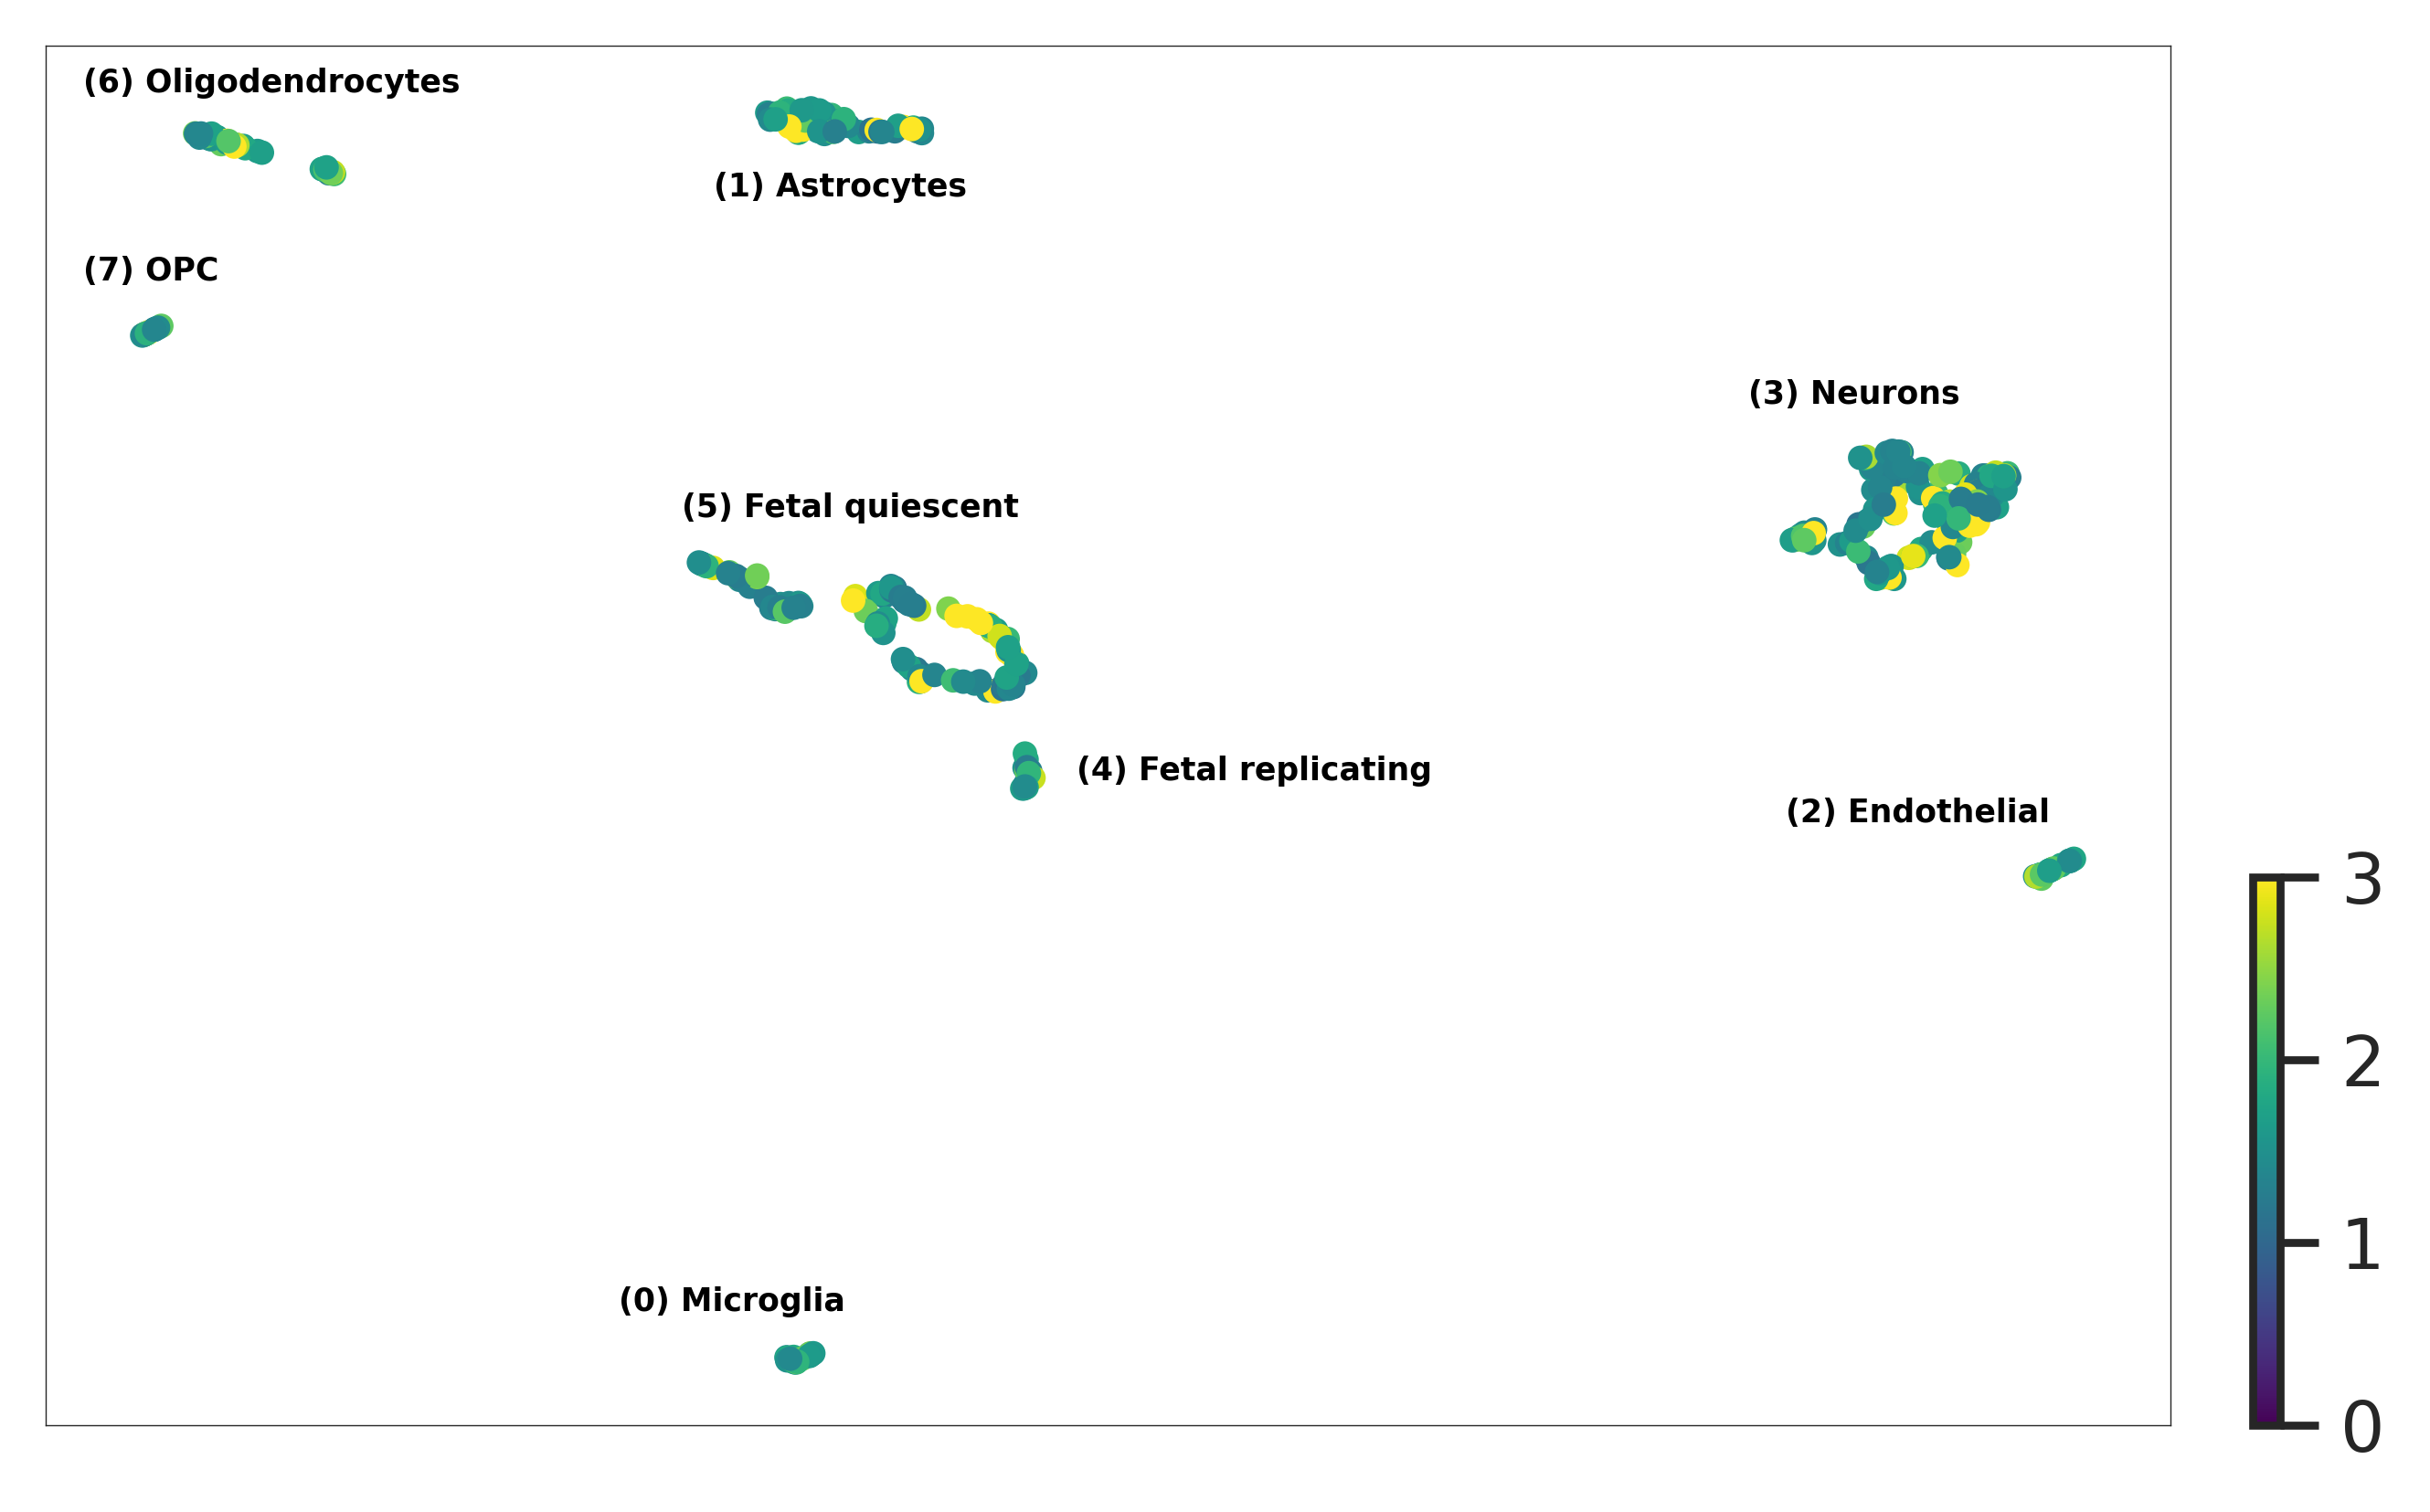

In [20]:
plt.tight_layout(w_pad=1.5, h_pad=3.5)

fig, ax = plt.subplots(1, 1)
cbar_ax = fig.add_axes([0.93, 0.125, .01, .3])

sns.scatterplot(ax=ax, x=cellvgae_umap[:, 0], y=cellvgae_umap[:, 1], hue=np.mean(mean_layer_cell_weights, axis=0), hue_norm=(0, 3), palette="viridis", s=15, edgecolor='black', linewidth=0.0)

norm = plt.Normalize(0, 3)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
# cax = fig.add_axes([1, .35, .01, .3])
ax.figure.colorbar(sm, shrink=.50, cax=cbar_ax)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_linewidth(0.2)
ax.spines['top'].set_linewidth(0.2)
ax.spines['bottom'].set_linewidth(0.2)
ax.spines['right'].set_linewidth(0.2)

ax.text(-1.5, -22.5, "(0) Microglia", horizontalalignment='left', size='5', color='black', weight='semibold')
ax.text(0, 14, "(1) Astrocytes", horizontalalignment='left', size='5', color='black', weight='semibold')
ax.text(17, -6.5, "(2) Endothelial", horizontalalignment='left', size='5', color='black', weight='semibold')
ax.text(16.4, 7.2, "(3) Neurons", horizontalalignment='left', size='5', color='black', weight='semibold')
ax.text(5.75, -5.1, "(4) Fetal replicating", horizontalalignment='left', size='5', color='black', weight='semibold')
ax.text(-0.5, 3.5, "(5) Fetal quiescent", horizontalalignment='left', size='5', color='black', weight='semibold')
ax.text(-10, 17.4, "(6) Oligodendrocytes", horizontalalignment='left', size='5', color='black', weight='semibold')
ax.text(-10, 11.25, "(7) OPC", horizontalalignment='left', size='5', color='black', weight='semibold')

# plt.savefig('darmanis_umap_layer_2_mean.pdf', dpi=500, bbox_inches = "tight")